In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


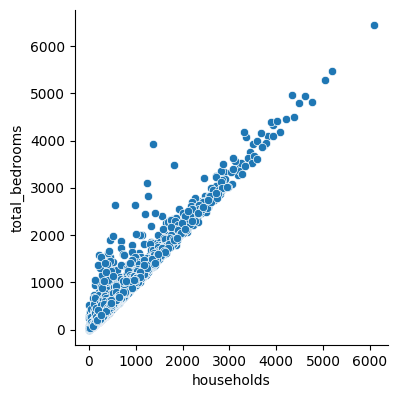

In [ ]:
sns.pairplot(df, x_vars=['households'], y_vars=['total_bedrooms'], height=4)

In [ ]:
households_copy = df['households'].copy()
total_rooms_copy = df['total_bedrooms'].copy()

In [ ]:
households_list = list(households_copy)
total_rooms_list = list(total_rooms_copy)

In [ ]:
households_array = np.array(households_list)
total_rooms_array = np.array(total_rooms_list)

In [ ]:
households_array = households_array / 1000
total_rooms_array = total_rooms_array / 1000

In [ ]:
#(2) hypothesis
W = tf.Variable(tf.random.normal([1]), name='weight') #초기값이고 tf.random_nornal()없어짐
b = tf.Variable(tf.random.normal([1]), name='bias')

def hypothesis(x):
  return W*x+b

#(3) cost function
def cost_fn(y_pred,y_true):
  return tf.reduce_mean(tf.square(y_pred-y_true))

#(4) stoohastic gradient decent algorithm to minimize cost function
optimizer = tf.optimizers.SGD(learning_rate=0.001)
#(5) run
def train():    #tf.Session() 대신에 tf.function으로 변경
  #tf.GradientTape를 사용하여 모델을 훈련, 자동 미분을 위한 tf.GradientTape함수를 사용
  with tf.GradientTape() as g:
    pred = hypothesis(households_array)
    cost = cost_fn(pred, total_rooms_array)

  #gradient 계산
  gradients = g.gradient(cost,[W, b])
  #print("gradientd = ",np.array(gradients))

  #gradients에 따라 W와 b업데이트
  optimizer.apply_gradients(zip(gradients,[W,b]))

In [ ]:
for step in range(2001):
  #W&b업데이트 위한 학습(최적화) 과정 실행
  train()

  #display
  if step%500==0:
    pred = hypothesis(households_array)
    cost=cost_fn(pred,total_rooms_array)
    #print("step=%i, cost=%f, W=%f, b=%f" %(step+1,cost,W.numpy(), b.numpy()))
    print("step={}, cost={}, W={}, b={}" .format(step+1,cost,W.numpy(), b.numpy()))

step=1, cost=0.1059851199388504, W=[1.2325523], b=[-0.38758406]
step=501, cost=0.023203281685709953, W=[1.2942523], b=[-0.20623986]
step=1001, cost=0.015043799765408039, W=[1.2922193], b=[-0.14528477]
step=1501, cost=0.012965737842023373, W=[1.274642], b=[-0.11879279]
step=2001, cost=0.011651736684143543, W=[1.2546166], b=[-0.10287787]


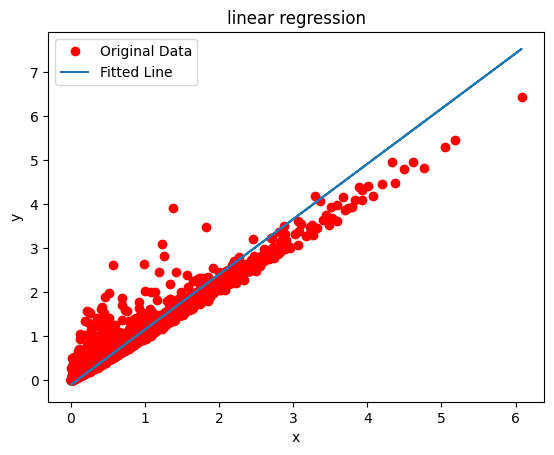

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#(6) visualiztion(시각화)
plt.plot(households_array,total_rooms_array,'ro',label='Original Data')
plt.plot(households_array,hypothesis(households_array),label='Fitted Line')
plt.legend()
plt.title("linear regression")
plt.xlabel("x")
plt.ylabel("y")
plt.show()